# Задание 1

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st

In [3]:
#Считывание данных в два списка
x1,x2=[],[]
with open('students.txt') as inf:
    head = inf.readline().split()
    c = inf.readline().split()
    while (c != []):
        if (c[0] == 'Before'):
            x1.append(int(c[2]))
        else:
            x2.append(int(c[2]))
        c = inf.readline().split()


Строим график зависимости соответствующих элементов выборки

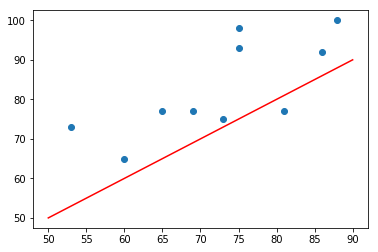

In [4]:
plt.scatter(x1, x2)
x = np.linspace(50,90,50)
plt.plot(x, x, 'r')

Так как в задаче спрашивается про изменение результатов в среднем, то неплохо бы воспользоваться двухвыборочным перестановочным критерием. Однако для него требуется симметричность распределеняи попарных разностей, проверим это.

In [6]:
y =[]
for i in range(10):
    y.append(x1[i]-x2[i])
print(y)    

[-12, -23, -6, -8, -5, 4, -12, -20, -18, -2]


In [8]:
#Проверяем на уровне значимости 0.95, что медиана выборки - это ноль.
from statsmodels.stats.descriptivestats import sign_test
sign_test(y)

(-4.0, 0.021484374999999997)

In [10]:
#Коэффицент ассиметрии
st.skew(y)

0.022254151255959257

Из критерия знаков получаем, что гипотезу о том, что медиана выборки это ноль, стоит отвергнуть. Коэффицент ассиметричности достаточно мал => попарные разности симметричны.
В итоге, все равно проверим равенство матожиданий с помощью двухвыборочного перестановочного критерия

### Двухвыборочный перестановочный критерий
$H_0$: среднее арифметическое не изменилось  
$H_1$: среднее арифметическое увеличилось 

In [12]:
#перестановочный критерий
import itertools
z = np.ones(10)
T = np.dot(y,z)
count = 0
print(T)
for i in list(itertools.product([1, -1], repeat=10)):
     if (np.dot(i,y) > T):
        count +=1
count
alpha = count/2**10
print(alpha)

-102.0
0.9970703125


In [14]:
from permute.core import one_sample
one_sample(y, alternative='less')

(0.0019400000000000528, -10.2)

Статистика получилась в $10$ раз меньше. Видимо, в $permute.core$ она реализована с делением на размер выборки.

Получаем уровень значимости $\alpha = 0.997$. Гипотезу на допустимом уровне значимости $0.95$ следует отвергнуть.

### Критерий знаковых рангов Уилкоксона для связанных выборок

$H_0$: $med(X_1-X_2) = 0$

$H_1$: $med(X_1-X_2) < 0$

In [16]:
import scipy.stats as st
st.wilcoxon(x1, x2)

WilcoxonResult(statistic=2.0, pvalue=0.00929822320829811)

Отвергаем гипотезу о неизменности среднего на уровне значимости $0.95$ 

## Критерии при использовании предложения о нормальности выборок (параметрические критерии)


Оценим нормальность выборки на qq-графике.

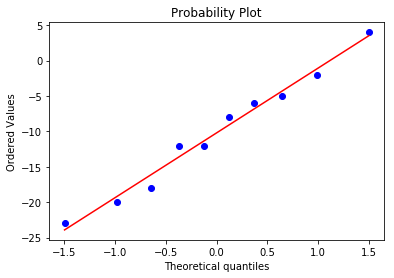

In [18]:
_=st.probplot(y, plot=plt)

(array([1., 2., 0., 0., 2., 1., 2., 1., 0., 1.]),
 array([-23. , -20.3, -17.6, -14.9, -12.2,  -9.5,  -6.8,  -4.1,  -1.4,
          1.3,   4. ]),
 <a list of 10 Patch objects>)

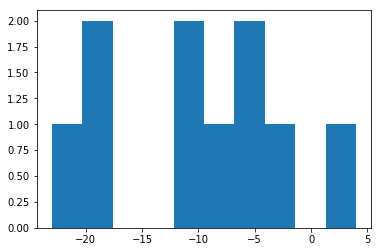

In [20]:
plt.hist(y)

На qq-графике видно, что выборка согласуется с нормальным распределением

###### Проверим нормальность критериями Шапиро-Уилка и Харке-Бера.

Из них видно, что гипотезу нормальности не отвергаем, т.к. p-value велико в обоих случаях.

In [22]:
st.shapiro(y)

(0.9754936099052429, 0.9365940690040588)

In [24]:
st.jarque_bera(y)

(0.36571563847142596, 0.8328865677677046)

Выборку считаем нормальной, поэтому применим t-критерий Стьюдента для зависимых выборок (люди, сдававшие эказмен до и после, были одними и теми же)

### t-критерий Стьюдента для связанных выборок

In [26]:
st.ttest_rel(x1, x2)

Ttest_relResult(statistic=-3.808374649652914, pvalue=0.004163495155629837)

Судя по результатам, гипотезу $H_0$ также следует отклонить

### Определим размер эффекта по Cohen's d.

In [27]:
n = 10
s1 = np.std(x1, ddof=1)
s2 = np.std(x2, ddof=1)
s = (((n-1)*s1**2 + (n-1)*s2**2)/(2*n-2))**0.5
d = (np.mean(x1) - np.mean(x2))/s
print(d)

-0.8828678212381178


Размер эффекта по модулю больше $0.8$, значит размер эффекта назовём Large.

## Вывод

С помощью перестановочного критерия, критерия занковых рангов Уилкоксона для связанных выборок и t-критерия Стьюдента приходим к выводу, что гипотезу о неизменности среднего следует отвергнуть. Результаты после прохождения курса, как и ожидалось, улучшились. Размер эффекта по Cohen's d  оказался Large и равен $0.88$